In [3]:
library(dplyr)
library(ggplot2)
library(data.table)
library(ROCR)
library(pROC)
library(pscl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [2]:
getwd()

[1] "/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/jupyter_notebooks"

In [1]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

In [4]:
#read in scores
target.prs.lasso.1 <- read.table("003_lassoSum/target_data/IBD_GSA_fin_prs_lasso1.txt", header = T)
target.prs.lasso.2 <- read.table("003_lassoSum/target_data/IBD_GSA_fin_prs_lasso2.txt", header = T)
target.prs.lasso.3 <- read.table("003_lassoSum/target_data/IBD_GSA_fin_prs_lasso3.txt", header = T)
target.prs.lasso.4 <- read.table("003_lassoSum/target_data/IBD_GSA_fin_prs_lasso4.txt", header = T)

Warning message in file(file, "rt"):
“cannot open file '003_lassoSum/target_data/IBD_GSA_fin_prs_lasso1.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


Read in the 1000 genome data

In [5]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

In [7]:
external_prs.lasso.1 <- read.table("003_lassoSum/external_data/IBD_GSA_fin_prs_lasso1_external.txt", header = TRUE)
external_prs.lasso.1 <- external_prs.lasso.1[complete.cases(external_prs.lasso.1), ]
external_prs.lasso.2 <- read.table("003_lassoSum/external_data/IBD_GSA_fin_prs_lasso2_external.txt", header = TRUE)
external_prs.lasso.2 <- external_prs.lasso.2[complete.cases(external_prs.lasso.2), ]
external_prs.lasso.3 <- read.table("003_lassoSum/external_data/IBD_GSA_fin_prs_lasso3_external.txt", header = TRUE)
external_prs.lasso.3 <- external_prs.lasso.3[complete.cases(external_prs.lasso.3), ]
external_prs.lasso.4 <- read.table("003_lassoSum/external_data/IBD_GSA_fin_prs_lasso4_external.txt", header = TRUE)
external_prs.lasso.4 <- external_prs.lasso.4[complete.cases(external_prs.lasso.4), ]

In [8]:
ext_mean.lasso.1 <- mean(external_prs.lasso.1$best.pgs)
ext_sd.lasso.1 <- sd(external_prs.lasso.1$best.pgs)
ext_mean.lasso.2 <- mean(external_prs.lasso.2$best.pgs)
ext_sd.lasso.2 <- sd(external_prs.lasso.2$best.pgs)
ext_mean.lasso.3 <- mean(external_prs.lasso.3$best.pgs)
ext_sd.lasso.3 <- sd(external_prs.lasso.3$best.pgs)
ext_mean.lasso.4 <- mean(external_prs.lasso.4$best.pgs)
ext_sd.lasso.4 <- sd(external_prs.lasso.4$best.pgs)

In [9]:
#standardize target
target.prs.lasso.1$std_prs <- (target.prs.lasso.1$best.pgs - ext_mean.lasso.1) / ext_sd.lasso.1
target.prs.lasso.2$std_prs <- (target.prs.lasso.2$best.pgs - ext_mean.lasso.2) / ext_sd.lasso.2
target.prs.lasso.3$std_prs <- (target.prs.lasso.3$best.pgs - ext_mean.lasso.3) / ext_sd.lasso.3
target.prs.lasso.4$std_prs <- (target.prs.lasso.4$best.pgs - ext_mean.lasso.4) / ext_sd.lasso.4

In [10]:
#update the phenotype 
target.prs.lasso.1$pheno <- target.prs.lasso.1$pheno - 1
target.prs.lasso.2$pheno <- target.prs.lasso.2$pheno - 1
target.prs.lasso.3$pheno <- target.prs.lasso.3$pheno - 1
target.prs.lasso.4$pheno <- target.prs.lasso.4$pheno - 1

In [11]:
#construct logistic regression to see which is the best of the four
log_model.lasso.1 <- glm(pheno ~ std_prs, data = target.prs.lasso.1, family = binomial(link = "logit"))
log_model.lasso.2 <- glm(pheno ~ std_prs, data = target.prs.lasso.2, family = binomial(link = "logit"))
log_model.lasso.3 <- glm(pheno ~ std_prs, data = target.prs.lasso.3, family = binomial(link = "logit"))
log_model.lasso.4 <- glm(pheno ~ std_prs, data = target.prs.lasso.4, family = binomial(link = "logit"))

In [12]:
#make a list of the explained variance
explained_var.lasso <- c(with(summary(log_model.lasso.1), 1 - deviance/null.deviance), with(summary(log_model.lasso.2), 1 - deviance/null.deviance), with(summary(log_model.lasso.3), 1 - deviance/null.deviance),with(summary(log_model.lasso.4), 1 - deviance/null.deviance))

In [13]:
#obtain the highest explained variance 
best_prs.lasso <- which.max(explained_var.lasso)

In [14]:
#make a list of the prs datasets
targets.lasso <- list(target.prs.lasso.1, target.prs.lasso.2, target.prs.lasso.3, target.prs.lasso.4)

In [15]:
#obtain the best prs by indexing from which model
#had the best explained variance
best_target.lasso <- as.data.frame(targets.lasso[best_prs.lasso])
best_target.lasso <- best_target.lasso[complete.cases(best_target.lasso), ]

In [16]:
#recode phenotype into a factor
best_target.lasso$pheno <- as.factor(best_target.lasso$pheno)

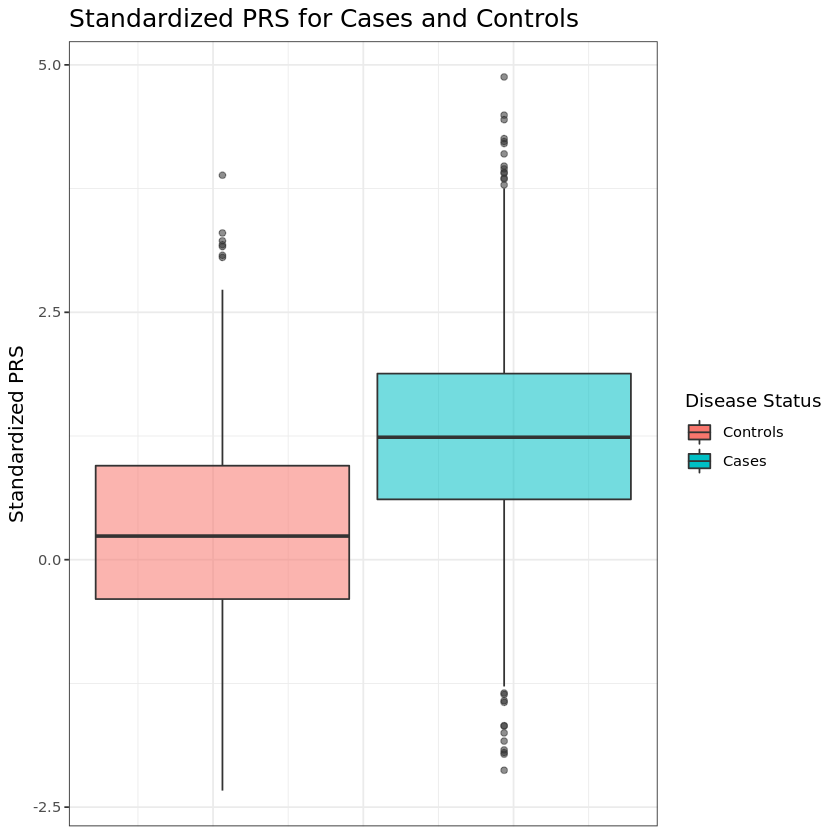

In [17]:
#make boxplot
ggplot(best_target.lasso, aes(y = std_prs, group = pheno, fill = pheno, alpha = 0.5)) +
labs(title = "Standardized PRS for Cases and Controls", y = "Standardized PRS", fill = 'Disease Status')+
geom_boxplot() + guides (alpha = "none") + theme_bw() + 
theme(plot.title = element_text(size=15), axis.title.y =  element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank()) + scale_fill_discrete(labels = c("Controls","Cases"))

In [249]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

In [252]:
#need to write table for best prs
write.table(best_target.lasso, "005_comparison/best_prs_lassoSum.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)

Do bootstrapping on the ROC estimate so we can have a confidence interval for the AUC metric.

In [253]:
#run the ROC
lasso.roc <- roc(best_target.lasso$pheno, best_target.lasso$std_prs, smooth = F)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [254]:
#do the bootstrapping 
lasso.roc.ci <- ci.auc(lasso.roc, method = "bootstrap", boot.n = 1000, boot.stratified = TRUE)

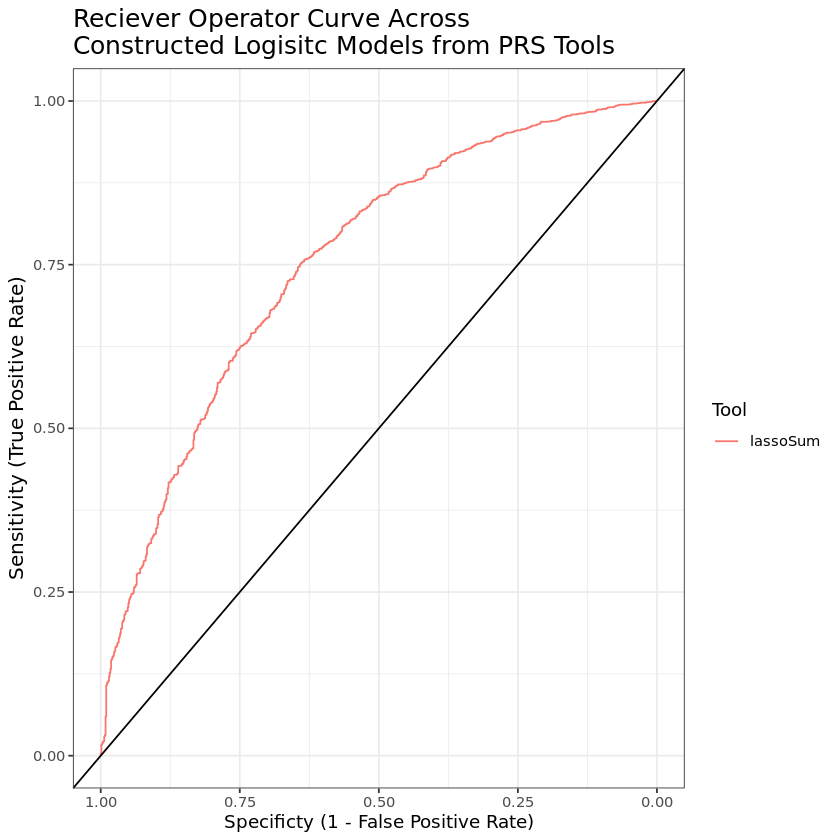

In [255]:
#plot the roc curve
#to add more curves just add the roc output to the list
#example: `list(lasso=lasso.roc, PLINK = plink.roc)
ggroc(list(lassoSum=lasso.roc)) + 
labs(title = "Reciever Operator Curve Across\nConstructed Logisitc Models from PRS Tools ",y = "Sensitivity (True Positive Rate)", x = "Specificty (1 - False Positive Rate)", col = "Tool") +
theme_bw() + theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12)) +
geom_abline(intercept = 1, slope = 1)

In [256]:
#write a function to allow for rounding
scaleFUN <- function(x) sprintf("%.3f", x)

In [257]:
#create a dataframe for the auc metric 
performance_metrics_auc <- data.frame(matrix(ncol = 4, nrow = 0))
#enter the lassoSum estimates
lasso_perform_auc <- c("lassoSum",lasso.roc.ci[1],lasso.roc.ci[2],lasso.roc.ci[3])
#enter a test estimate for plotting
test_auc <- c('test', 0.6734, 0.73241, 0.7876)
#combine with the empty dataframe
performance_metrics_auc <- rbind(performance_metrics_auc, lasso_perform_auc, test_auc)
#rename the columns of the dataframe
colnames(performance_metrics_auc) <- c("tool", "lower_95", "estimate", "upper_95")

In [258]:
#make the dataframe columns numeric
performance_metrics_auc$lower_95 <- as.numeric(performance_metrics_auc$lower_95)
performance_metrics_auc$estimate <- as.numeric(performance_metrics_auc$estimate)
performance_metrics_auc$upper_95 <- as.numeric(performance_metrics_auc$upper_95)
head(performance_metrics_rsqr)

,tool,lower_95,estimate,upper_95
,<chr>,<dbl>,<dbl>,<dbl>
1,lassoSum,0.1188936,0.1403313,0.161769
2,test,0.0234000,0.0632410,0.087600


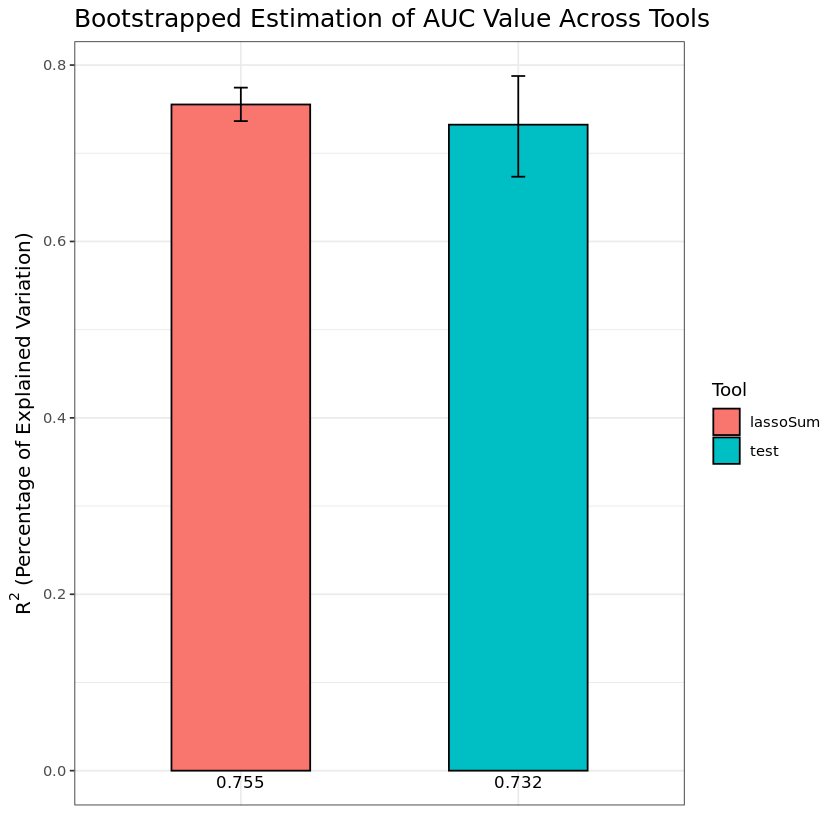

In [259]:
#make the r-sqr plot
ggplot(performance_metrics_auc, aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black")+
labs(title = bquote("Bootstrapped Estimation of AUC Value Across Tools"), y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.02) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())+
geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 

Do CV with logisitic regression to obtain confidence intervals for the r-sqr metric

In [260]:
#bootstrap
n <- nrow(best_target)
resamples <- 1000
bootstrap_pseudor2_lasso <- sapply(1:resamples, function(j) {
  bootstraps <- sample(c(1:n), n, TRUE)
  pR2(glm(best_target.lasso$pheno[bootstraps] ~ best_target.lasso$std_prs[bootstraps], 
          family = binomial("logit")))[["McFadden"]]
})

fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting nu

In [261]:
#save the upper and lower bounds, as the estimate
lower_95_lasso <- mean(bootstrap_pseudor2_lasso) - 1.96 * sd(bootstrap_pseudor2_lasso)
r_sqr_est_lasso <-mean(bootstrap_pseudor2_lasso)
upper_95_lasso <- mean(bootstrap_pseudor2_lasso) + 1.96 * sd(bootstrap_pseudor2_lasso)

In [262]:
#create an empty dataframe
performance_metrics_rsqr <- data.frame(matrix(ncol = 4, nrow = 0))
#enter the lassoSum estimates
lasso_perform_rsqr <- c("lassoSum", lower_95_lasso, r_sqr_est_lasso ,upper_95_lasso)
#enter a test estimate for plotting
test_rsqr <- c('test', 0.0234, 0.063241, 0.0876)
#combine with the empty dataframe
performance_metrics_rsqr <- rbind(performance_metrics_rsqr, lasso_perform_rsqr, test_rsqr)
#rename the columns of the dataframe
colnames(performance_metrics_rsqr) <- c("tool", "lower_95", "estimate", "upper_95")

In [263]:
#make the dataframe columns numeric
performance_metrics_rsqr$lower_95 <- as.numeric(performance_metrics_rsqr$lower_95)
performance_metrics_rsqr$estimate <- as.numeric(performance_metrics_rsqr$estimate)
performance_metrics_rsqr$upper_95 <- as.numeric(performance_metrics_rsqr$upper_95)
head(performance_metrics_rsqr)

,tool,lower_95,estimate,upper_95
,<chr>,<dbl>,<dbl>,<dbl>
1,lassoSum,0.1202203,0.1422135,0.1642067
2,test,0.0234000,0.0632410,0.0876000


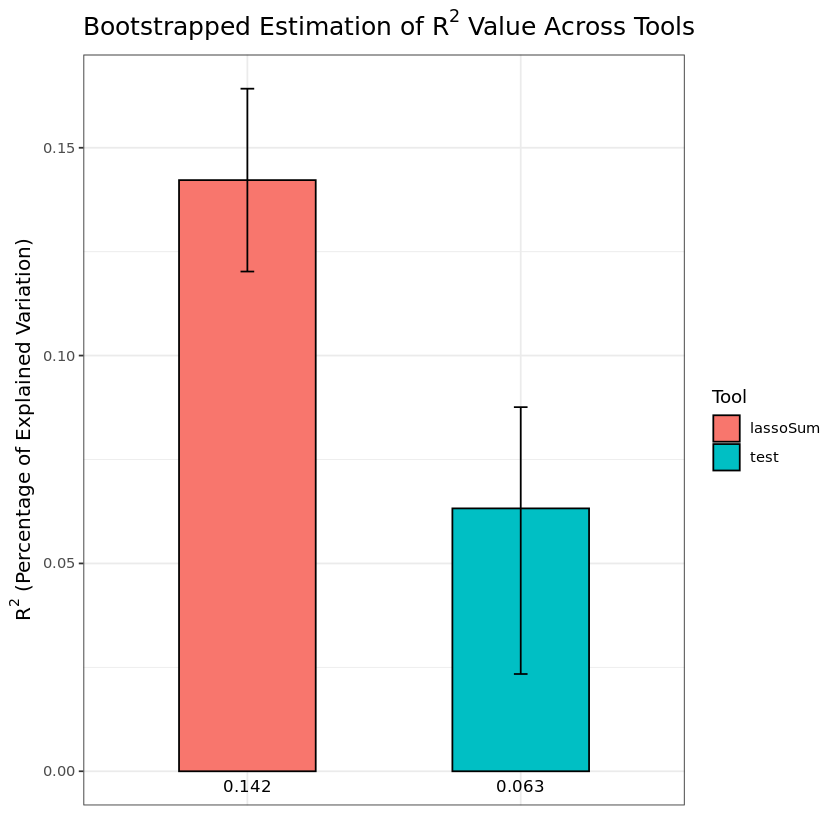

In [266]:
#make the r-sqr plot
ggplot(performance_metrics_rsqr, aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black")+
labs(title = bquote("Bootstrapped Estimation of"~R^2~"Value Across Tools"), y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.005) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())+
geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 

In [ ]:
#END MAKING PLOTS

# END PLOTS!

In [39]:
#split data for test and training
set.seed(0)

df_case <- best_target %>% filter(pheno == 1)
df_control <- best_target %>% filter(pheno == 0)

index_case <- sample(1:nrow(df_case), size = .80 * nrow(df_case))
index_control <- sample(1:nrow(df_control), size = 0.80 * nrow(df_control))

train_control <- df_control[index_control,]
train_case <- df_case[index_case,]

test_control <- df_control[-index_control,]
test_case <- df_case[-index_case, ]

#merge the test and train sets and remove nas
train_mrg <- rbind(train_case, train_control) %>% na.omit()
test_mrg <- rbind(test_case, test_control) %>% na.omit()

In [40]:
nrow(train_mrg)
nrow(test_mrg)

[1] 3091

[1] 773

In [41]:
#make logisitic regression
train.lasso.log <- glm(pheno ~ std_prs, data = train_mrg, family = binomial(link = "logit"))
lasso.r_sqr <- with(summary(train.lasso.log), 1 - deviance/null.deviance)

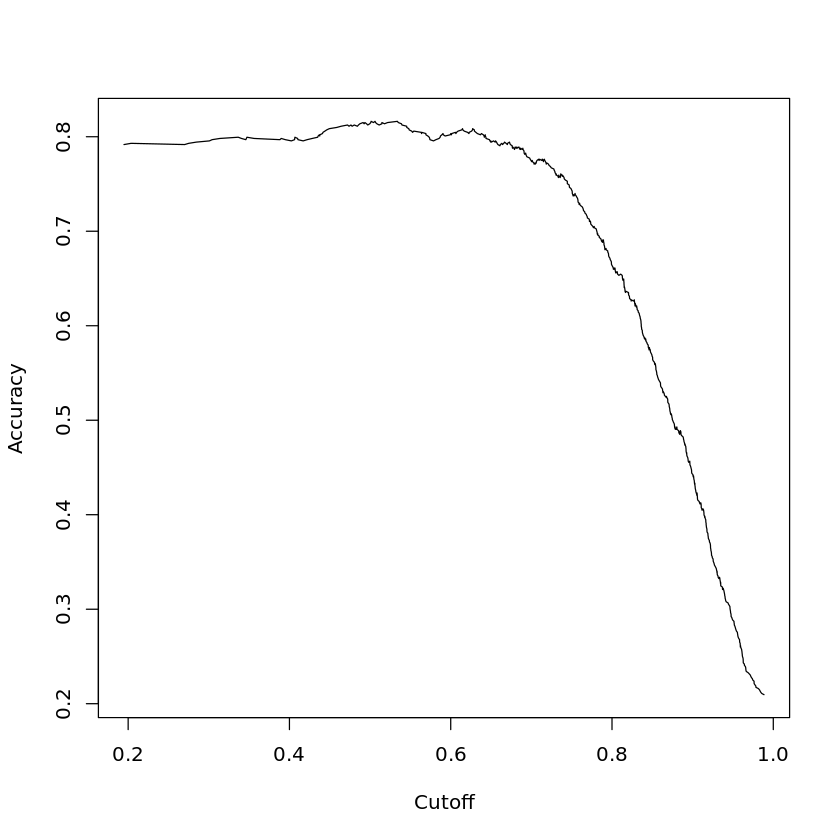

In [42]:
#determine the prediction for test
lasso_pred <- predict(train.lasso.log, test_mrg, type = 'response')

#make prediction
lasso_pred <- prediction(lasso_pred, test_mrg$pheno)
lasso_perf <- performance(lasso_pred, "acc")
plot(lasso_perf)

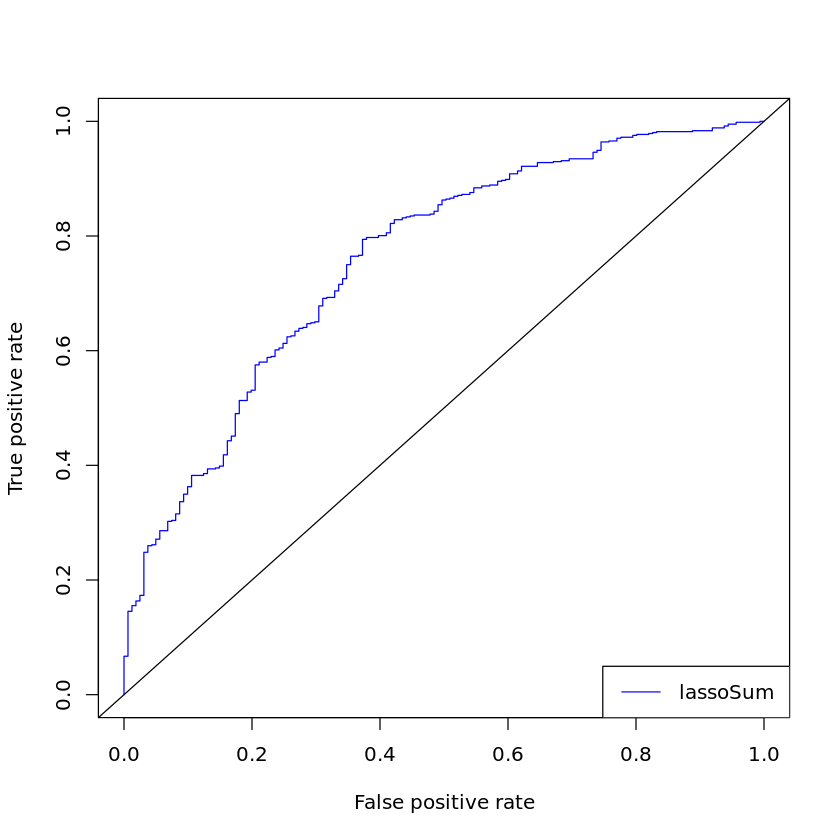

In [54]:
#do ROC analysis 
lasso_max_ind <- which.max(slot(lasso_perf, "y.values")[[1]] )
lasso_acc <- slot(lasso_perf, "y.values")[[1]][lasso_max_ind]
#lasso_cutoff = slot(perf, "x.values")[[1]][lasso_max_ind]
#print(c(accuracy= acc, cutoff = cutoff))


roc = performance(lasso_pred,"tpr","fpr")
plot(roc, colorize = F, lwd = 1, col = "blue", grid = T)
abline(a = 0, b = 1)
legend("bottomright",legend=c("lassoSum"),col=c("blue"), lty = 1)

In [116]:
class(roc)

[1] "performance"
attr(,"package")
[1] "ROCR"

In [123]:
ggroc(roc)

ERROR: Error in UseMethod("ggroc"): no applicable method for 'ggroc' applied to an object of class "performance"


In [44]:
#create a table data containing the r-sqred and the AUC
performance_metrics <- data.frame(matrix(ncol = 3, nrow = 0))
lasso_perform <- c("lassoSum", lasso.r_sqr,  lasso_acc)
test <- c('test', 0.0234, 0.9876)
performance_metrics <- rbind(performance_metrics, lasso_perform, test)

In [45]:
colnames(performance_metrics) <- c("tool", "r_sqr", "auc")
performance_metrics$r_sqr <- as.numeric(performance_metrics$r_sqr)
performance_metrics$auc <- as.numeric(performance_metrics$auc)
head(performance_metrics)

,tool,r_sqr,auc
,<chr>,<dbl>,<dbl>
1,lassoSum,0.1381764,0.8163001
2,test,0.0234000,0.9876000


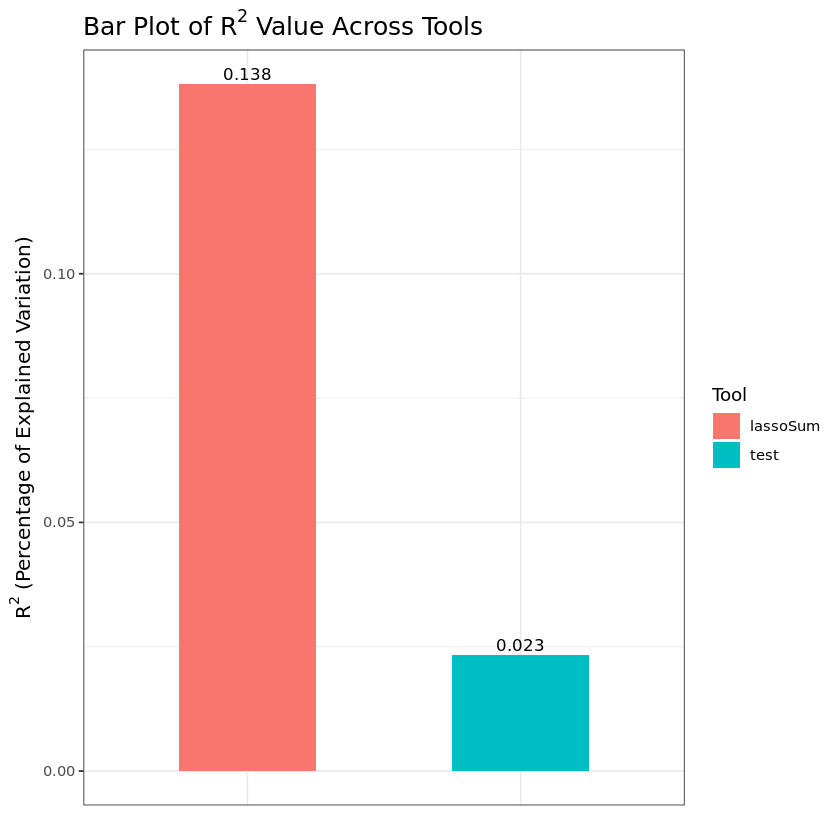

In [53]:
scaleFUN <- function(x) sprintf("%.3f", x)

ggplot(performance_metrics, aes(y = r_sqr, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5)+
labs(title = bquote("Bar Plot of"~R^2~"Value Across Tools"), y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(r_sqr)), vjust=-0.3, size=3.5) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())

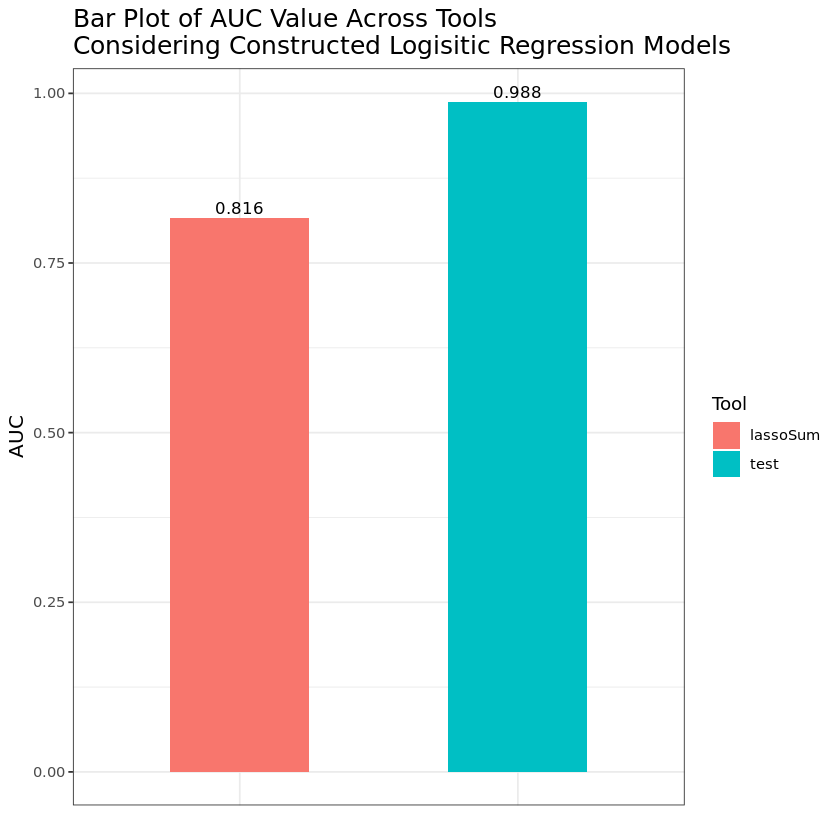

In [52]:
#now make the AUC plot
ggplot(performance_metrics, aes(y = auc, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5)+
labs(title = bquote("Bar Plot of AUC Value Across Tools\nConsidering Constructed Logisitic Regression Models"), y = bquote("AUC"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(auc)), vjust=-0.3, size=3.5) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())

In [119]:
pR2(glm(best_target$pheno[bootstrap_cases] ~ best_target$std_prs[bootstrap_cases], family = binomial("logit")))[["McFadden"]]

fitting null model for pseudo-r2


[1] 0.1143767

In [111]:
bootstrap_cases <- sample(c(1:nrow(best_target)), nrow(best_target), TRUE)

In [114]:
best_target[bootstrap_cases]

ERROR: Error in `[.data.frame`(best_target, bootstrap_cases): undefined columns selected


In [ ]:
logistic_model <- function(dat, inds) { mod <- glm(pheno[inds] ~std_prs[inds], data = dat)}

In [48]:
head(target.prs.1)
nrow(target.prs.1)

,FID,IID,pheno,order,best.pgs
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,HG00096,HG00096,169.1322,1,-2.0723897
2,HG00097,HG00097,171.2563,2,1.1949882
3,HG00099,HG00099,171.5344,3,-0.7039950
4,HG00101,HG00101,169.8502,4,0.1714423
5,HG00102,HG00102,172.7884,5,0.2608572
6,HG00103,HG00103,169.8630,6,0.8392051


[1] 475

In [113]:
#best prs
prs_best <- read.table("IBD_GSA_imp_updated_prs_results.txt", header = T)
head(prs_best)
nrow(target.prs.1)

,FID,IID,pheno,order,best.pgs
,<int>,<int>,<int>,<int>,<dbl>
1,9263,9263,1,1,-0.020725243
2,9535,9535,2,2,0.012936013
3,5924,5924,2,3,0.026746788
4,2762,2762,2,4,-0.028418774
5,9323,9323,1,5,0.008072106
6,7670,7670,2,6,-0.058116953


[1] 3888

In [114]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/data")

In [115]:
#read in fam file to obtain phenotypes
target.fam <- read.table("IBD_GSA_imp_updated.fam")
colnames(target.fam) <- c("FID", "IID", "father_ID", "mother_ID", "sex", "pheno")
target.pheno <- read.table("final_phenotypes.txt", header = T)
colnames(target.pheno) <- c("FID","IID","pheno")
head(target.pheno)

,FID,IID,pheno
,<int>,<int>,<int>
1,9263,9263,1
2,9535,9535,2
3,5924,5924,2
4,2762,2762,2
5,9323,9323,1
6,7670,7670,2


In [21]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/003_lassoSum/external_data")

In [24]:
external_prs.1 <- read.table("IBD_GSA_imp_updated_prs_lasso1_external.txt", header = TRUE)
external_prs.1 <- external_prs.1[complete.cases(external_prs.1), ]
external_prs.2 <- read.table("IBD_GSA_imp_updated_prs_lasso2_external.txt", header = TRUE)
external_prs.2 <- external_prs.2[complete.cases(external_prs.2), ]
external_prs.3 <- read.table("IBD_GSA_imp_updated_prs_lasso3_external.txt", header = TRUE)
external_prs.3 <- external_prs.3[complete.cases(external_prs.3), ]
external_prs.4 <- read.table("IBD_GSA_imp_updated_prs_lasso4_external.txt", header = TRUE)
external_prs.4 <- external_prs.4[complete.cases(external_prs.4), ]

In [25]:
head(external_prs.1)

,FID,IID,pheno,best.pgs
,<chr>,<chr>,<int>,<dbl>
1,NA12718,NA12718,-9,0.032126041
2,NA12748,NA12748,-9,0.032168928
3,NA12775,NA12775,-9,0.017522501
4,NA12777,NA12777,-9,0.013511984
5,NA12778,NA12778,-9,-0.005725379
6,NA12827,NA12827,-9,0.004605137


In [30]:
#make the target pheno be on a 0 to 1 scale
target.prs.1$pheno <- target.prs.1$pheno - 1
target.prs.2$pheno <- target.prs.2$pheno - 1
target.prs.3$pheno <- target.prs.3$pheno - 1
target.prs.4$pheno <- target.prs.4$pheno - 1
head(target.prs.1)

,FID,IID,pheno,order,best.pgs
,<int>,<int>,<dbl>,<int>,<dbl>
1,9263,9263,0,1,-0.008510313
2,9535,9535,1,2,0.013978511
3,5924,5924,1,3,0.030674872
4,2762,2762,1,4,-0.022176851
5,9323,9323,0,5,0.003137698
6,7670,7670,1,6,-0.033195389


In [31]:
ext_mean.1 <- mean(external_prs.1$best.pgs)
ext_sd.1 <- sd(external_prs.1$best.pgs)
ext_mean.2 <- mean(external_prs.2$best.pgs)
ext_sd.2 <- sd(external_prs.2$best.pgs)
ext_mean.3 <- mean(external_prs.3$best.pgs)
ext_sd.3 <- sd(external_prs.3$best.pgs)
ext_mean.4 <- mean(external_prs.4$best.pgs)
ext_sd.4 <- sd(external_prs.4$best.pgs)

In [32]:
ext_mean.1
ext_sd.1

[1] 0.008155422

[1] 0.0175604

In [33]:
#standardize target
target.prs.1$std_prs <- (target.prs.1$best.pgs - ext_mean.1) / ext_sd.1
target.prs.2$std_prs <- (target.prs.2$best.pgs - ext_mean.2) / ext_sd.2
target.prs.3$std_prs <- (target.prs.3$best.pgs - ext_mean.3) / ext_sd.3
target.prs.4$std_prs <- (target.prs.4$best.pgs - ext_mean.4) / ext_sd.4


#target.prs.1$std_prs <- (target.prs.1$prs - mean(target.prs.1$prs)) / sd(target.prs.1$prs)
#target.prs.2$std_prs <- (target.prs.2$prs - mean(target.prs.2$prs)) / sd(target.prs.2$prs)
#target.prs.3$std_prs <- (target.prs.3$prs - mean(target.prs.3$prs)) / sd(target.prs.3$prs)
#target.prs.4$std_prs <- (target.prs.4$prs - mean(target.prs.4$prs)) / sd(target.prs.4$prs)


#prs_best$std_prs <- (prs_best$best.pgs - ext_mean.1) / ext_sd.1

In [34]:
target.prs.1 <- target.prs.1[complete.cases(target.prs.1),]
target.prs.2 <- target.prs.2[complete.cases(target.prs.2),]
target.prs.3 <- target.prs.3[complete.cases(target.prs.3),]
target.prs.4 <- target.prs.4[complete.cases(target.prs.4),]

In [35]:
head(target.prs.1)
nrow(target.prs.1)

,FID,IID,pheno,order,best.pgs,std_prs
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,9263,9263,0,1,-0.008510313,-0.9490521
2,9535,9535,1,2,0.013978511,0.3316034
3,5924,5924,1,3,0.030674872,1.2823995
4,2762,2762,1,4,-0.022176851,-1.7273109
5,9323,9323,0,5,0.003137698,-0.2857409
6,7670,7670,1,6,-0.033195389,-2.3547760


[1] 3864

In [123]:
prs_best <- prs_best[complete.cases(prs_best),]
#prs_best1 <- prs_best[!prs_best$FID %in% outlrs, ]
#external_prs.1 <- external_prs.1[complete.cases(external_prs.1), ]

In [124]:
target.prs.1.merge <- merge(x=target.prs.1, y= target.pheno,by=c("FID","IID"), all.x=TRUE)
head(target.prs.1.merge)
target.prs.1.merge <- target.prs.1.merge[complete.cases(target.prs.1.merge), ]

,FID,IID,prs,std_prs,pheno
,<chr>,<chr>,<dbl>,<dbl>,<int>
1,1,1,-0.033802931,-1.49299392,2
2,10003,10003,0.005506062,-0.38479089,2
3,10004,10004,0.022309880,0.08894403,2
4,10006,10006,-0.025839556,-1.26848968,1
5,10008,10008,0.101026000,2.30811672,1
6,10013,10013,-0.027796555,-1.32366158,2


In [125]:
nrow(target.prs.1.merge)

[1] 3864

In [15]:
#need to standardize within external dataset first
#obtain external dataset mean and sd
ext_mean.1 <- mean(external_prs.1)
ext_sd.1 <- sd(external_prs.1)
ext_mean.2 <- mean(external_prs.2)
ext_sd.2 <- sd(external_prs.2)
ext_mean.3 <- mean(external_prs.3)
ext_sd.3 <- sd(external_prs.3)
ext_mean.4 <- mean(external_prs.4)
ext_sd.4 <- sd(external_prs.4)

In [16]:
#now standardize external
external_prs.1 <- (external_prs.1 - ext_mean.1) / ext_sd.1
external_prs.2 <- (external_prs.2 - ext_mean.2) / ext_sd.2
external_prs.3 <- (external_prs.3 - ext_mean.3) / ext_sd.3
external_prs.4 <- (external_prs.4 - ext_mean.4) / ext_sd.4

In [20]:
#recalculate their mean and SD
targ_mean.1 <- mean(target.prs.1$prs)
targ_sd.1 <- sd(target.prs.1$prs)
targ_mean.2 <- mean(target.prs.2$prs)
targ_sd.2 <- sd(target.prs.2$prs)
targ_mean.3 <- mean(target.prs.3$prs)
targ_sd.3 <- sd(target.prs.3$prs)
targ_mean.4 <- mean(target.prs.4$prs)
targ_sd.4 <- sd(target.prs.4$prs)

[1] 0.01553194

In [22]:
external_prs.1 <- (external_prs.1 - targ_mean.1) / targ_sd.1
external_prs.2 <- (external_prs.2 - targ_mean.2) / targ_sd.2
external_prs.3 <- (external_prs.3 - targ_mean.3) / targ_sd.3
external_prs.4 <- (external_prs.4 - targ_mean.4) / targ_sd.4

In [25]:
ext_mean.1 <- mean(external_prs.1)
ext_sd.1 <- sd(external_prs.1)
ext_mean.2 <- mean(external_prs.2)
ext_sd.2 <- sd(external_prs.2)
ext_mean.3 <- mean(external_prs.3)
ext_sd.3 <- sd(external_prs.3)
ext_mean.4 <- mean(external_prs.4)
ext_sd.4 <- sd(external_prs.4)

In [26]:
ext_mean.4

[1] 0.309083

In [34]:
#standardize target
target.prs.1$std_prs <- (target.prs.1$prs - ext_mean.1) / ext_sd.1
target.prs.2$std_prs <- (target.prs.2$prs - ext_mean.2) / ext_sd.2
target.prs.3$std_prs <- (target.prs.3$prs - ext_mean.3) / ext_sd.3
target.prs.4$std_prs <- (target.prs.4$prs - ext_mean.4) / ext_sd.4

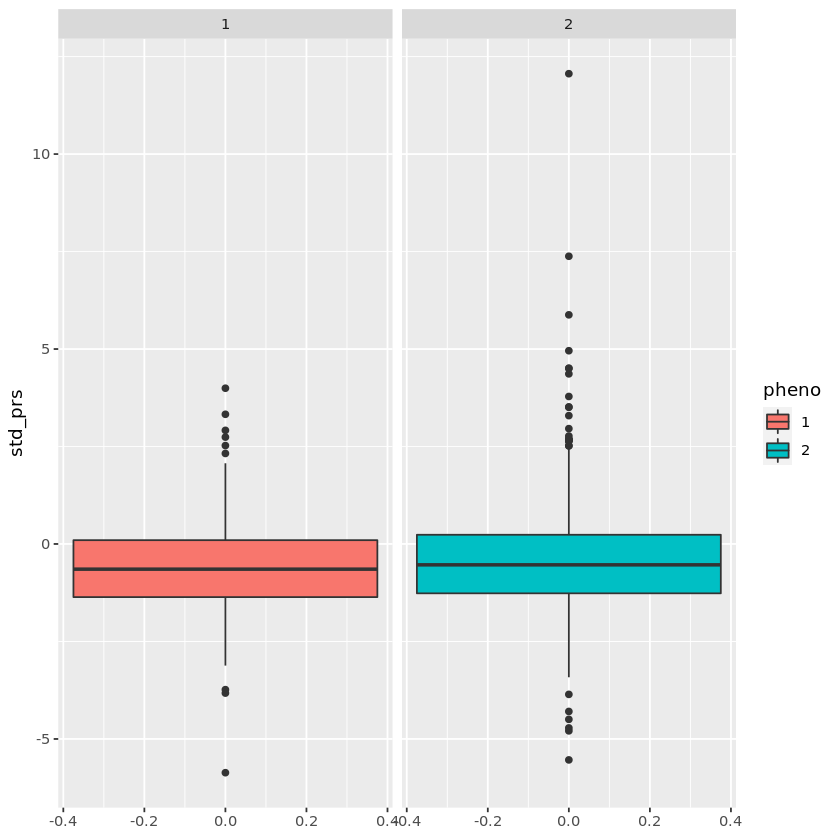

In [77]:
prs_best$pheno <- as.factor(prs_best$pheno)

ggplot(prs_best, aes(y = std_prs, group = pheno, fill = pheno)) +
geom_boxplot() +  facet_wrap(~pheno)

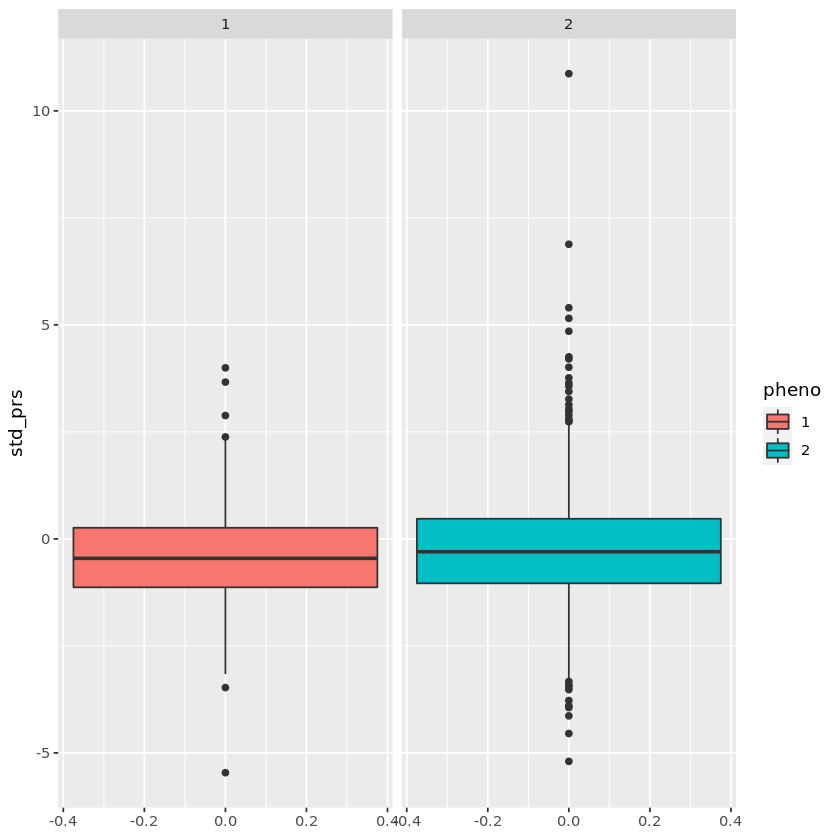

In [126]:
target.prs.1.merge$pheno <- as.factor(target.prs.1.merge$pheno)

ggplot(target.prs.1.merge, aes(y = std_prs, group = pheno, fill = pheno)) +
geom_boxplot() +  facet_wrap(~pheno)

In [51]:
#calculate the logisitic regression models
#log_best <- glm(pheno ~ std_prs, data = prs_best1, family = binomial(link = "logit"))
log_model1 <- glm(pheno ~ best.pgs, data = target.prs.1)#, family = binomial(link = "logit"))
#log_model2 <- glm(pheno ~ std_prs, data = target.prs.2, family = binomial(link = "logit"))
#log_model3 <- glm(pheno ~ std_prs, data = target.prs.3, family = binomial(link = "logit"))
#log_model4 <- glm(pheno ~ std_prs, data = target.prs.4, family = binomial(link = "logit"))

In [52]:
#in logisitic regression we must use a pseuod-rsqred value
#this is McFadden's r-sqred
#with(summary(log_best), 1 - deviance/null.deviance)
with(summary(log_model1), 1 - deviance/null.deviance)
#with(summary(log_model2), 1 - deviance/null.deviance)
#with(summary(log_model3), 1 - deviance/null.deviance)
#with(summary(log_model4), 1 - deviance/null.deviance)

[1] 0.1923122

In [25]:
head(target.prs.1)

,prs,pheno,std_prs
,<dbl>,<dbl>,<dbl>
1,0.002218194,0,-0.5252879
2,0.026598959,1,0.3809489
3,0.046141772,1,1.1073583
4,-0.007926663,1,-0.9023739
5,0.006892979,0,-0.3515254
6,-0.031057992,1,-1.7621690


In [21]:
log_best <- glm(pheno ~ std_prs, data = prs_best, family = binomial(link = "logit"))
with(summary(log_best), 1 - deviance/null.deviance)

[1] 0.002060578

In [43]:
summary(log_model1)


Call:
glm(formula = pheno ~ std_prs, family = binomial(link = "logit"), 
    data = target.prs.1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8793   0.6344   0.6727   0.6991   0.7443  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.37875    0.04467  30.868   <2e-16 ***
std_prs      0.08647    0.04006   2.159   0.0309 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3952.1  on 3863  degrees of freedom
Residual deviance: 3947.4  on 3862  degrees of freedom
AIC: 3951.4

Number of Fisher Scoring iterations: 4


In [41]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/data")
eig <- read.table("IBD_GSA_fin2.eigenvec")

In [42]:
nrow(eig)

[1] 3859

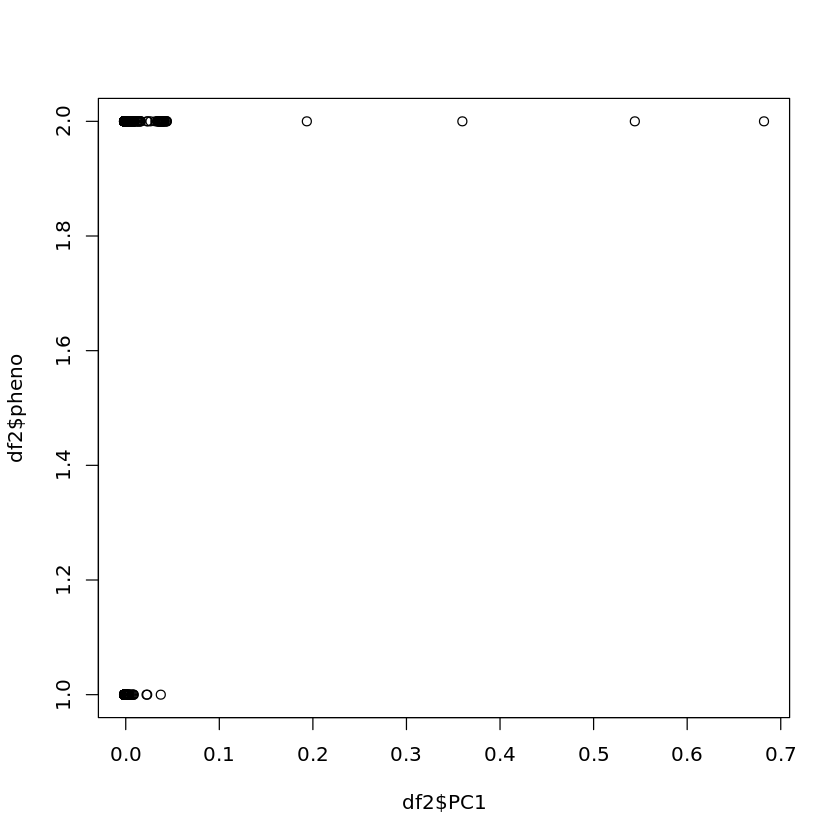

In [44]:
#main PC against disease status 
colnames(eig) <- c("FID", "IID", "PC1","PC2","PC3","PC4","PC5","PC6")
df2 <- merge(x=eig,y=target.fam, 
             by="IID", all.x=TRUE)
#head(df2)
plot(df2$PC1, df2$pheno)#, xlim = c(0,0.01))#, xlim = c(-0.1,0.1), ylim = c(-0.1,0.1))

In [29]:
head(df2)

,IID,FID.x,PC1,PC2,PC3,PC4,PC5,PC6,FID.y,father_ID,mother_ID,sex,pheno
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,1,-0.001399920,-0.000642696,7.67090e-05,2.89442e-06,-0.000503030,2.74591e-05,1,0,0,0,2
2,2,2,-0.001381080,-0.000513670,-9.97031e-05,-7.24527e-05,0.000315943,-1.04560e-03,2,0,0,0,2
3,3,3,-0.001259730,-0.000294166,6.86185e-05,-4.37865e-05,-0.000127320,-2.00997e-04,3,0,0,0,2
4,5,5,-0.000776475,-0.001080980,1.42510e-04,-1.52990e-04,0.000371125,-7.05362e-04,5,0,0,0,2
5,7,7,-0.001241960,-0.000377039,3.25405e-04,-2.29435e-04,0.000121253,-5.45645e-04,7,0,0,0,2
6,8,8,-0.000804543,-0.000707440,2.57467e-04,-2.31081e-04,-0.000036798,-5.29470e-04,8,0,0,0,2


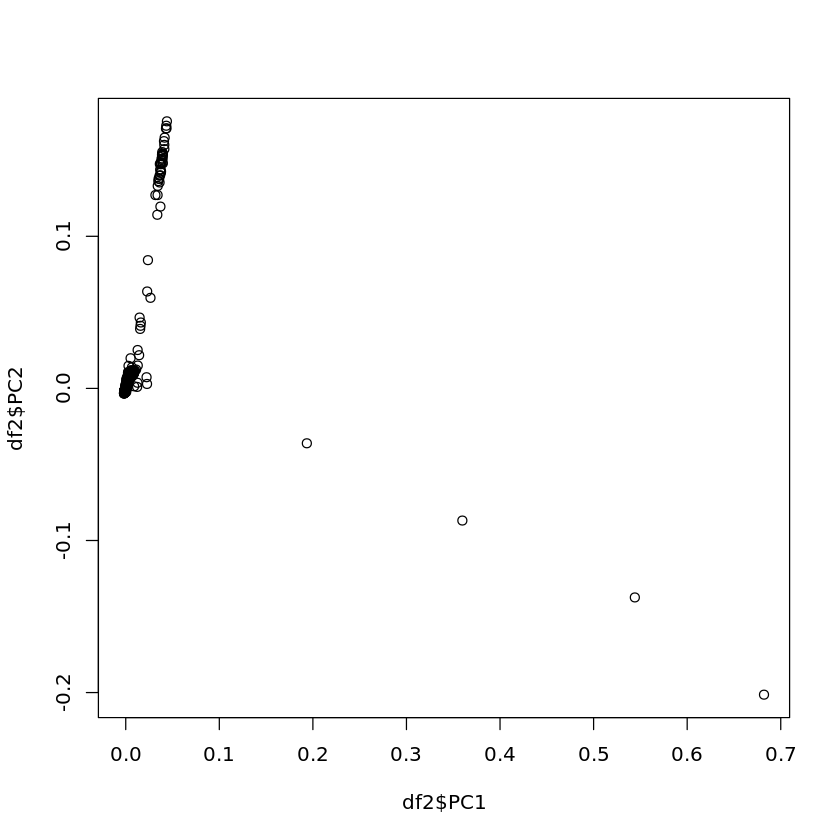

In [50]:
#PC1 vs PC2 
plot(df2$PC1, df2$PC2)#, xlim = c(0,0.1), ylim = c (-0.1,0.2))

In [51]:
outlrs <- c(filter(eig, PC1 > 0.1)[,2])
outlrs
nrow(eig)
eig1 <- eig[!eig$FID %in% outlrs, ]
nrow(eig1)

[1]  9751 11049 13259 11357

[1] 3859

[1] 3855

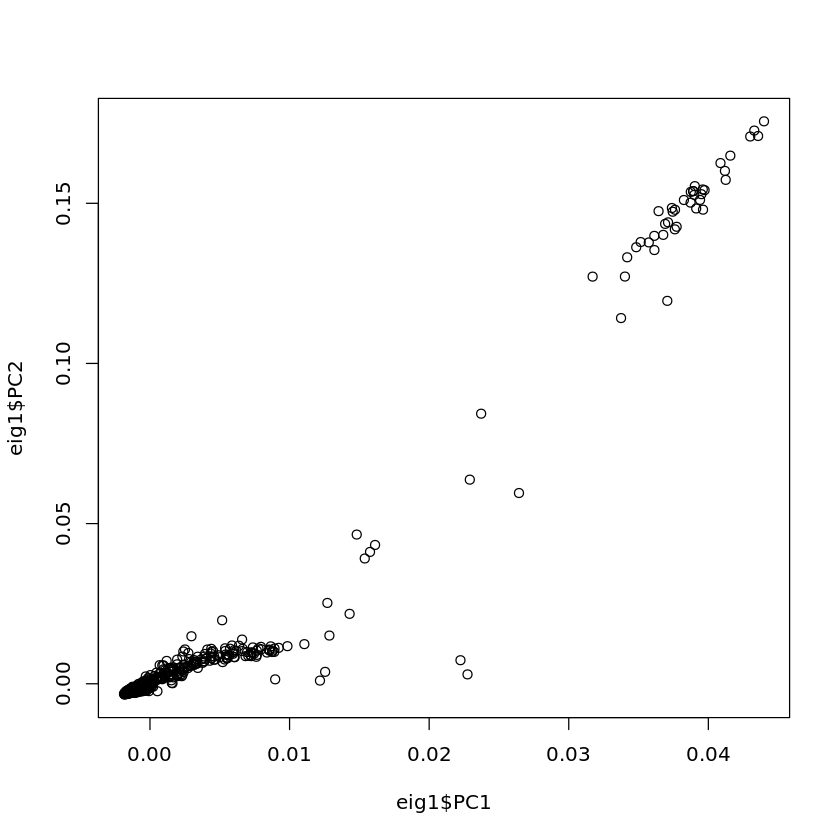

In [72]:
#plot(eig1$PC1, eig1$pc1)#, xlim = c(0,0.15))
plot(eig1$PC1,eig1$PC2)

In [32]:
(filter(eig, V3 > 0.222))

V1,V2,V3,V4,V5,V6,V7,V8
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10172,10172,0.508189,0.663691,-0.320219,0.408829,-0.1523980,-0.0675570
9718,9718,0.304951,0.179227,0.148848,-0.271401,0.8612010,-0.1814750
12831,12831,0.328598,0.197323,0.270430,-0.727507,-0.4709890,-0.1551640
8914,8914,0.694108,-0.691413,-0.104714,0.140178,-0.0557011,-0.0592261


In [41]:
#this is from the tutorial 
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/")
tut_eig <- read.table("EUR.eigenvec")

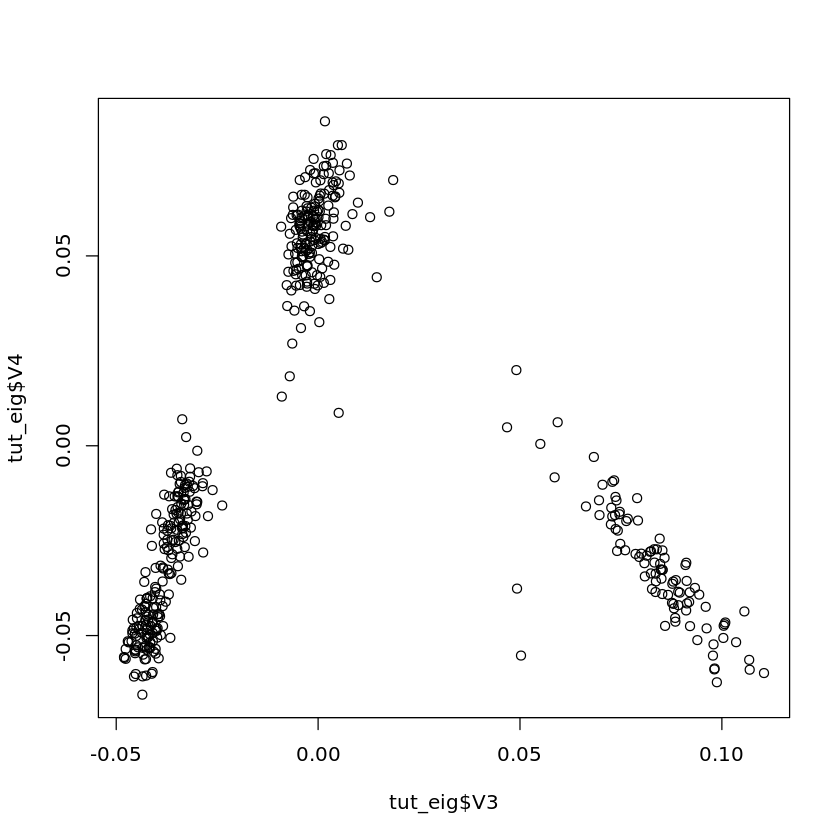

In [42]:
plot(tut_eig$V3, tut_eig$V4)

In [59]:
head(prs_best)

,FID,IID,pheno,order,best.pgs
,<int>,<int>,<int>,<int>,<dbl>
1,9263,9263,1,1,-0.011708551
2,9535,9535,2,2,0.012681093
3,5924,5924,2,3,0.032238759
4,2762,2762,2,4,-0.021857755
5,9323,9323,1,5,-0.007023028
6,7670,7670,2,6,-0.044992200


In [60]:
glm(pheno ~ best.pgs, data = prs_best)


Call:  glm(formula = pheno ~ best.pgs, data = prs_best)

Coefficients:
(Intercept)     best.pgs  
     1.7919       0.4768  

Degrees of Freedom: 3863 Total (i.e. Null);  3862 Residual
  (246 observations deleted due to missingness)
Null Deviance:	    636.7 
Residual Deviance: 635.9 	AIC: 4000

In [71]:
prs_best$pheno <- prs_best$pheno-1
prs_best$std_prs <- (prs_best$best.pgs - mean(prs_best$best.pgs)) / sd(prs_best$best.pgs)


In [72]:
head(prs_best)

,FID,IID,pheno,order,best.pgs,std_prs
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,9263,9263,0,1,-0.011708551,-0.3973776
2,9535,9535,1,2,0.012681093,0.4303848
3,5924,5924,1,3,0.032238759,1.0941543
4,2762,2762,1,4,-0.021857755,-0.7418324
5,9323,9323,0,5,-0.007023028,-0.2383552
6,7670,7670,1,6,-0.044992200,-1.5269945


In [73]:
glm(pheno ~ best.pgs, data = prs_best, family = binomial(link = "logit"))


Call:  glm(formula = pheno ~ best.pgs, family = binomial(link = "logit"), 
    data = prs_best)

Coefficients:
(Intercept)     best.pgs  
      1.339        2.952  

Degrees of Freedom: 3863 Total (i.e. Null);  3862 Residual
Null Deviance:	    3952 
Residual Deviance: 3947 	AIC: 3951